## 1. Regresión de una función con Theano. (30 puntos)

Crear un conjunto de datos utilizando el siguiente código:

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
import theano
import theano.tensor as T

trX = np.linspace(-1, 1, 101)

trY = np.linspace(-1, 1, 101)

for i in range(len(trY)):
    trY[i] = math.log(1 + 0.5 * abs(trX[i])) + trX[i] / 3 + np.random.randn() * 0.033

Ahora utilizar Theano para obtener los parámetros w0 y w1 del siguiente modelo
utilizando los datos generados anteriormente.

$y = log (1 + w0|x|) + w1 x$

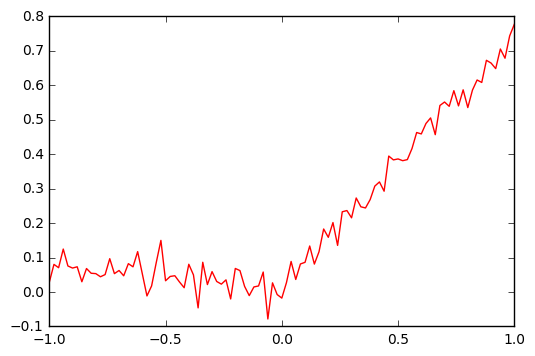

In [2]:
plt.plot(trX, trY, 'r-' )

In [3]:
trY

array([ 0.02834702,  0.08016548,  0.07053468,  0.12466243,  0.07555734,
        0.06950901,  0.07319235,  0.02974324,  0.06815265,  0.05442075,
        0.05336407,  0.04421262,  0.05056106,  0.09672335,  0.05334199,
        0.06245055,  0.04702504,  0.08227462,  0.0731272 ,  0.11719518,
        0.05300214, -0.01143149,  0.01765299,  0.08552931,  0.1498111 ,
        0.03257076,  0.04516902,  0.04722765,  0.02903972,  0.01244255,
        0.0805228 ,  0.04959919, -0.0461286 ,  0.08631179,  0.02156981,
        0.05914586,  0.03057603,  0.02284075,  0.03526784, -0.02015673,
        0.06834638,  0.06214097,  0.01625852, -0.01049091,  0.01468724,
        0.01756248,  0.05794006, -0.07836715,  0.02657589, -0.00737119,
       -0.01772648,  0.02723215,  0.08868701,  0.0364006 ,  0.08134978,
        0.08619435,  0.13355669,  0.08105825,  0.11682459,  0.18286441,
        0.15878839,  0.2015865 ,  0.13530232,  0.2328686 ,  0.23645276,
        0.21539403,  0.27293456,  0.24739861,  0.24399257,  0.26

In [4]:
trX

array([-1.  , -0.98, -0.96, -0.94, -0.92, -0.9 , -0.88, -0.86, -0.84,
       -0.82, -0.8 , -0.78, -0.76, -0.74, -0.72, -0.7 , -0.68, -0.66,
       -0.64, -0.62, -0.6 , -0.58, -0.56, -0.54, -0.52, -0.5 , -0.48,
       -0.46, -0.44, -0.42, -0.4 , -0.38, -0.36, -0.34, -0.32, -0.3 ,
       -0.28, -0.26, -0.24, -0.22, -0.2 , -0.18, -0.16, -0.14, -0.12,
       -0.1 , -0.08, -0.06, -0.04, -0.02,  0.  ,  0.02,  0.04,  0.06,
        0.08,  0.1 ,  0.12,  0.14,  0.16,  0.18,  0.2 ,  0.22,  0.24,
        0.26,  0.28,  0.3 ,  0.32,  0.34,  0.36,  0.38,  0.4 ,  0.42,
        0.44,  0.46,  0.48,  0.5 ,  0.52,  0.54,  0.56,  0.58,  0.6 ,
        0.62,  0.64,  0.66,  0.68,  0.7 ,  0.72,  0.74,  0.76,  0.78,
        0.8 ,  0.82,  0.84,  0.86,  0.88,  0.9 ,  0.92,  0.94,  0.96,
        0.98,  1.  ])

In [5]:
X = T.scalar()
Y = T.scalar()

def model(X, w0, w1):
    return np.log(1 + w0 * abs(X)) + w1 * X 

w0 = theano.shared(np.asarray(0., dtype = theano.config.floatX))
w1 = theano.shared(np.asarray(0., dtype = theano.config.floatX))

y = model(X, w0, w1)

cost     = T.mean(T.sqr(y - Y))
gradient_w0 = T.grad(cost = cost, wrt = w0)
gradient_w1 = T.grad(cost = cost, wrt = w1)

updates  = [[w0, w0 - gradient_w0 * 0.01], [w1, w1 - gradient_w1 * 0.01]]

train = theano.function(inputs = [X, Y], outputs = cost, updates = updates, allow_input_downcast = True)

for i in range(15):
    for x, y in zip(trX, trY):
        cost_i = train(x, y)
    print 'En el paso', i, 'el valor de w0 es', w0.get_value(), ', w1 es', w1.get_value(), ', con un coste', cost_i

En el paso 0 el valor de w0 es 0.197073846959 , w1 es 0.168106732094 , con un coste 0.197336732405
En el paso 1 el valor de w0 es 0.301017759642 , w1 es 0.253739809112 , con un coste 0.0722259644363
En el paso 2 el valor de w0 es 0.364063465742 , w1 es 0.295713976552 , con un coste 0.0310868607223
En el paso 3 el valor de w0 es 0.404570609456 , w1 es 0.315801301753 , con un coste 0.0157041209387
En el paso 4 el valor de w0 es 0.431354374517 , w1 es 0.325150929134 , con un coste 0.00924695194696
En el paso 5 el valor de w0 es 0.449344894314 , w1 es 0.329327291386 , con un coste 0.00623512667059
En el paso 6 el valor de w0 es 0.461539989298 , w1 es 0.331066003906 , con un coste 0.00469580087482
En el paso 7 el valor de w0 es 0.469852293864 , w1 es 0.331692729672 , con un coste 0.00384778835001
En el paso 8 el valor de w0 es 0.475537400772 , w1 es 0.331838384719 , con un coste 0.00335235035085
En el paso 9 el valor de w0 es 0.479434004211 , w1 es 0.331795543768 , con un coste 0.0030497135

## 2. Red neuronal con Theano. (70 puntos)
Utilizando como ejemplo la hoja CIF007_04_02 implementar y entrenar con Theano una red
neuronal que reproduzca una operación XOR de tres entradas, es decir que reproduzca la tabla:


Entrada 1 | Entrada 2 | Entrada 3 | Salida
--------- | --------- | --------- | ------
0         | 0         | 0         | 0
0         | 0         | 1         | 1
0         | 1         | 0         | 1
0         | 1         | 1         | 0
1         | 0         | 0         | 1
1         | 0         | 1         | 0
1         | 1         | 0         | 0
1         | 1         | 1         | 1

In [6]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
import theano
import theano.tensor as T

In [7]:
# Definimos las variables. En este caso vamos a diseñar una red neuronal con 3 capas; la primera de ellas contendrá
# 3 neuronas para recibir las 3 entradas posibles, la segunda capa contará con 2 neuronas y la tercera y última con
# tan solo una. Tendremos por tanto 6 pesos (uno por neurona), los 5 primeros serán arrays de 3 elementos y el sexto
# tendrá tan sólo 2 ya que recibirá como entradas, las salidas (2) de las neuronas a4 y a5. Por último definimos los
# 3 biases, uno por cada capa de la red neuronal.
x = T.matrix('x')
w1 = theano.shared(np.array([.1, .2, .3], dtype = theano.config.floatX))
w2 = theano.shared(np.array([.3, .4, .5], dtype = theano.config.floatX))
w3 = theano.shared(np.array([.5, .6, .7], dtype = theano.config.floatX))
w4 = theano.shared(np.array([.7, .8, .9], dtype = theano.config.floatX))
w5 = theano.shared(np.array([.5, .6, .7], dtype = theano.config.floatX))
w6 = theano.shared(np.array([.7, .8], dtype = theano.config.floatX))
b1 = theano.shared(1.)
b2 = theano.shared(1.)
b3 = theano.shared(1.)
learning_rate = 0.01

In [8]:
# Aquí expresamos la relación entre las distintas neuronas de la red (capa 1 - a1, a2, a3; capa 2 - a4, a5; capa 3 - a6) 
a1 = 1 / (1 + T.exp(-T.dot(x, w1) - b1))
a2 = 1 / (1 + T.exp(-T.dot(x, w2) - b1))
a3 = 1 / (1 + T.exp(-T.dot(x, w3) - b1))
x2 = T.stack([a1, a2, a3], axis = 1)
a4 = 1 / (1 + T.exp(-T.dot(x2, w4) - b2))
a5 = 1 / (1 + T.exp(-T.dot(x2, w5) - b2))
x3 = T.stack([a4, a5], axis = 1)
a6 = 1 / (1 + T.exp(-T.dot(x3, w6) - b3))

In [9]:
# Función de coste, gradiente y entrenamiento de la red
a_hat = T.vector('a_hat')
cost = -(a_hat * T.log(a6) + (1 - a_hat) * T.log(1 - a6)).sum()
dw1, dw2, dw3, dw4, dw5, dw6, db1, db2, db3 = T.grad(cost, [w1, w2, w3, w4, w5, w6, b1, b2, b3])

train = theano.function(
    inputs = [x,a_hat],
    outputs = [a6,cost],
    updates = [
        [w1, w1 - learning_rate * dw1],
        [w2, w2 - learning_rate * dw2],
        [w3, w3 - learning_rate * dw3],
        [w4, w4 - learning_rate * dw4],
        [w5, w5 - learning_rate * dw5],
        [w6, w6 - learning_rate * dw6],
        [b1, b1 - learning_rate * db1],
        [b2, b2 - learning_rate * db2],
        [b3, b3 - learning_rate * db3]
    ]
)

Los resultados de la red son:
El resultado para [0, 0, 0] es 0.00
El resultado para [0, 0, 1] es 1.00
El resultado para [0, 1, 0] es 1.00
El resultado para [0, 1, 1] es 0.00
El resultado para [1, 0, 0] es 1.00
El resultado para [1, 0, 1] es 0.00
El resultado para [1, 1, 0] es 0.00
El resultado para [1, 1, 1] es 1.00

El vector w1 es [2.75, 2.75]
El vector w2 es [4.26, 4.26]
El vector w3 es [8.80, 8.80]
El vector w4 es [10.04, 10.04]
El vector w5 es [-6.33, -6.33]
El vector w6 es [14.12, 14.12]
El valor del bias 1 es -6.61
El valor del bias 2 es -4.19
El valor del bias 3 es -7.21


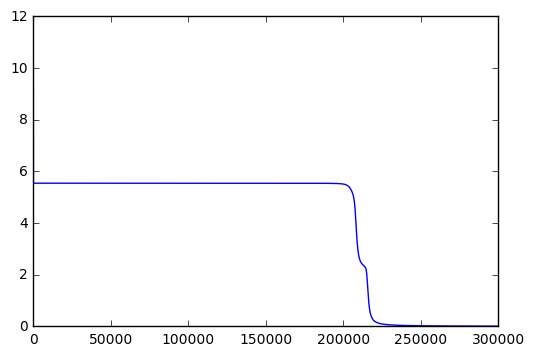

In [10]:
inputs = [[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1], [1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]]
outputs = [0, 1, 1, 0, 1, 0, 0, 1]

# Iteramos sobre el conjunto de entrenamiento 
cost = []
for iteration in range(300000):
    pred, cost_iter = train(inputs, outputs)
    cost.append(cost_iter)
    
# Se imprimen los resultados por pantalla
print 'Los resultados de la red son:'
for i in range(len(inputs)):
    print 'El resultado para [%d, %d, %d] es %.2f' % (inputs[i][0], inputs[i][1], inputs[i][2], pred[i])

    # Resultados
print
print 'El vector w1 es [%.2f, %.2f]' % (w1.get_value()[0], w1.get_value()[0])
print 'El vector w2 es [%.2f, %.2f]' % (w2.get_value()[0], w2.get_value()[0])
print 'El vector w3 es [%.2f, %.2f]' % (w3.get_value()[0], w3.get_value()[0])
print 'El vector w4 es [%.2f, %.2f]' % (w4.get_value()[0], w4.get_value()[0])
print 'El vector w5 es [%.2f, %.2f]' % (w5.get_value()[0], w5.get_value()[0])
print 'El vector w6 es [%.2f, %.2f]' % (w6.get_value()[0], w6.get_value()[0])
print 'El valor del bias 1 es %.2f' % b1.get_value()
print 'El valor del bias 2 es %.2f' % b2.get_value()
print 'El valor del bias 3 es %.2f' % b3.get_value()

# Función de esfuerzo en función del número de iteraciones
plt.plot(cost)